# CNN for detection and classification of Alzheimer’s disease using MRI data

# Dataset

## Data preparation

---




### Preprocessing functions

In [ ]:
from math import dist
import os
import numpy as np
from PIL import Image
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

def load_data(path: str):
  data_x = []
  data_y = []
  dir_list = os.listdir(path)

  for dir in dir_list:
    file_list = os.listdir((path + dir))
    for file in file_list:
      image = Image.open(path + dir + "/" + file)
      image = image.resize((224,224 ))
      image = image.convert("RGB")
      # print(image.size)
      data_x.append((image))
      data_y.append(dir)

  return (data_x), (data_y)



def augmentate_data(x, y, imb):
  distribution_before = Counter(y)
  print('Original dataset shape %s' % Counter(y))
  x = np.array(x)
  original_shape = x.shape
  x = x.reshape(x.shape[0], -1)

  ada = ADASYN(random_state=42)

  X_res, y_res = imb.fit_resample(x, y)

  print('Resampled dataset shape %s\n' % Counter(y_res))
  distribution_after = Counter(y_res)

  new_sample_count = X_res.shape[0]
  X_res = X_res.reshape((new_sample_count,) + original_shape[1:])

  return (X_res), (y_res), distribution_before, distribution_after

In [ ]:
from PIL import Image

def write_data(x, y, path="./adni/"):
  for i, (x, y) in enumerate(zip(x, y)):
    if isinstance(x, np.ndarray):
      x = Image.fromarray(x)
    if y == "AD" or y == "Final AD JPEG":
      x.save(path + "AD/" + "AD" + str(i) + ".png")
    elif y == "CN" or y == "Final CN JPEG":
      x.save(path + "CN/" + "CN" +str(i) + ".png")
    elif y == "EMCI" or y == "Final EMCI JPEG":
      x.save(path + "EMCI/" + "EMCI" + str(i) + ".png")
    elif y == "LMCI" or y == "Final LMCI JPEG":
      x.save(path + "LMCI/" + "LMCI" + str(i) + ".png")
    elif y == "MCI" or y == "Final MCI JPEG":
      x.save(path + "MCI/" + "MCI" + str(i) + ".png")

In [ ]:
import os
import shutil
import random

random.seed(42)

def copy_file(src,train,test,percent):
  files_list = os.listdir(src)
  random.shuffle(files_list)
  splitVal = int(round(percent*len(files_list)))
  train_file_list = files_list[:splitVal]
  test_file_list = files_list[splitVal:]

  print(len(train_file_list))
  print(len(test_file_list))

  if train:
    for file_name in train_file_list:
      shutil.move(src=src+file_name, dst=train+file_name)

  for file_name in test_file_list:
    shutil.move(src=src+file_name, dst=test+file_name)

### Original Dataset (authors method (ADASYN on all data))

Donwloading dataset from kaggle.com

In [ ]:
!rm -rf Alzheimers-ADNI-2/ Dataset sample_data

In [ ]:
!curl -L -o adni-5-classes.zip\
  https://www.kaggle.com/api/v1/datasets/download/abdulelahkhalaf/adni-5-classes
!unzip adni-5-classes.zip
!rm -rf adni-5-classes.zip

Augumentation of data using ADASYN

In [ ]:
data_x, data_y = load_data("./Alzheimers-ADNI-2/Alzheimers-ADNI-2/")
imb = ADASYN(random_state=42)
data_x, data_y, distribution_before2_after, distribution_after2 = augmentate_data(x = data_x, y = data_y, imb = imb)

Original dataset shape Counter({'Final CN JPEG': 580, 'Final EMCI JPEG': 240, 'Final MCI JPEG': 233, 'Final AD JPEG': 171, 'Final LMCI JPEG': 72})
Resampled dataset shape Counter({'Final MCI JPEG': 622, 'Final EMCI JPEG': 622, 'Final LMCI JPEG': 587, 'Final CN JPEG': 580, 'Final AD JPEG': 563})



In [ ]:
!rm -rf Dataset
!rm -rf Alzheimers-ADNI-2
!rm -rf adni
!mkdir adni
!mkdir adni/AD
!mkdir adni/CN
!mkdir adni/EMCI
!mkdir adni/LMCI
!mkdir adni/MCI

Writing new augumanted data

In [ ]:
write_data(data_x, data_y)

Dividing data into:
90% train data, 10% test data
and 10% of train data into validation data

In [ ]:
!rm -rf dataset
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test
!mkdir dataset/train/AD
!mkdir dataset/train/CN
!mkdir dataset/train/EMCI
!mkdir dataset/train/LMCI
!mkdir dataset/train/MCI
!mkdir dataset/test/AD
!mkdir dataset/test/CN
!mkdir dataset/test/EMCI
!mkdir dataset/test/LMCI
!mkdir dataset/test/MCI
!mkdir dataset/validate
!mkdir dataset/validate/AD
!mkdir dataset/validate/CN
!mkdir dataset/validate/EMCI
!mkdir dataset/validate/LMCI
!mkdir dataset/validate/MCI

In [ ]:
copy_file(src="./adni/AD/", train="./dataset/train/AD/", test="./dataset/test/AD/", percent=0.9)
copy_file(src="./adni/CN/", train="./dataset/train/CN/", test="./dataset/test/CN/", percent=0.9)
copy_file(src="./adni/EMCI/", train="./dataset/train/EMCI/", test="./dataset/test/EMCI/", percent=0.9)
copy_file(src="./adni/LMCI/", train="./dataset/train/LMCI/", test="./dataset/test/LMCI/", percent=0.9)
copy_file(src="./adni/MCI/", train="./dataset/train/MCI/", test="./dataset/test/MCI/", percent=0.9)

copy_file(src="./dataset/train/AD/", train=None, test="./dataset/validate/AD/", percent=0.9)
copy_file(src="./dataset/train/CN/", train=None, test="./dataset/validate/CN/", percent=0.9)
copy_file(src="./dataset/train/EMCI/", train=None, test="./dataset/validate/EMCI/", percent=0.9)
copy_file(src="./dataset/train/LMCI/", train=None, test="./dataset/validate/LMCI/", percent=0.9)
copy_file(src="./dataset/train/MCI/", train=None, test="./dataset/validate/MCI/", percent=0.9)

507
56
522
58
560
62
528
59
560
62
456
51
470
52
504
56
475
53
504
56


Zipping of filanl dataset

In [ ]:
# !zip -r dataset2.zip dataset

### Original Dataset (cut of data + ADASYN on train data)

Donwloading dataset from kaggle.com

In [ ]:
!rm -rf Alzheimers-ADNI-2/ Dataset sample_data

In [ ]:
!curl -L -o adni-5-classes.zip\
  https://www.kaggle.com/api/v1/datasets/download/abdulelahkhalaf/adni-5-classes
!unzip adni-5-classes.zip
!rm -rf adni-5-classes.zip

Dividing of data

In [ ]:
data_x, data_y = load_data("./Alzheimers-ADNI-2/Alzheimers-ADNI-2/")

In [ ]:
!rm -rf Dataset
!rm -rf Alzheimers-ADNI-2
!rm -rf adni
!mkdir adni
!mkdir adni/AD
!mkdir adni/CN
!mkdir adni/EMCI
!mkdir adni/LMCI
!mkdir adni/MCI

In [ ]:
write_data(data_x, data_y)

In [ ]:
!rm -rf dataset
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test
!mkdir dataset/train/AD
!mkdir dataset/train/CN
!mkdir dataset/train/EMCI
!mkdir dataset/train/LMCI
!mkdir dataset/train/MCI
!mkdir dataset/test/AD
!mkdir dataset/test/CN
!mkdir dataset/test/EMCI
!mkdir dataset/test/LMCI
!mkdir dataset/test/MCI
!mkdir dataset/validate
!mkdir dataset/validate/AD
!mkdir dataset/validate/CN
!mkdir dataset/validate/EMCI
!mkdir dataset/validate/LMCI
!mkdir dataset/validate/MCI

Dividing data into:
90% train data, 10% test data
and 10% of train data into validation data

In [ ]:
copy_file(src="./adni/AD/", train="./dataset/train/AD/", test="./dataset/test/AD/", percent=0.9)
copy_file(src="./adni/CN/", train="./dataset/train/CN/", test="./dataset/test/CN/", percent=0.9)
copy_file(src="./adni/EMCI/", train="./dataset/train/EMCI/", test="./dataset/test/EMCI/", percent=0.9)
copy_file(src="./adni/LMCI/", train="./dataset/train/LMCI/", test="./dataset/test/LMCI/", percent=0.9)
copy_file(src="./adni/MCI/", train="./dataset/train/MCI/", test="./dataset/test/MCI/", percent=0.9)

copy_file(src="./dataset/train/AD/", train=None, test="./dataset/validate/AD/", percent=0.9)
copy_file(src="./dataset/train/CN/", train=None, test="./dataset/validate/CN/", percent=0.9)
copy_file(src="./dataset/train/EMCI/", train=None, test="./dataset/validate/EMCI/", percent=0.9)
copy_file(src="./dataset/train/LMCI/", train=None, test="./dataset/validate/LMCI/", percent=0.9)
copy_file(src="./dataset/train/MCI/", train=None, test="./dataset/validate/MCI/", percent=0.9)

154
17
522
58
216
24
65
7
210
23
139
15
470
52
194
22
58
7
189
21


Cutting of data

In [ ]:
dir_list = os.listdir("./dataset/train")
for dir in dir_list:
  print(dir)
  print(len(os.listdir("./dataset/train/" + dir)))

dir_list = os.listdir("./dataset/validate")
for dir in dir_list:
  print(dir)
  print(len(os.listdir("./dataset/validate/" + dir)))

dir_list = os.listdir("./dataset/test")
for dir in dir_list:
  print(dir)
  print(len(os.listdir("./dataset/test/" + dir)))

CN
566
AD
157
LMCI
58
EMCI
226
MCI
219
CN
7
AD
7
LMCI
7
EMCI
7
MCI
7
CN
7
AD
7
LMCI
7
EMCI
7
MCI
7


In [ ]:
def cut_data(path: str):
  dir_list = os.listdir(path)
  num_files = {}
  for dir in dir_list:
    num_files[dir] = len(os.listdir(path + dir))

  min_num_files = min(num_files.values())
  print(min_num_files)

  for dir in dir_list:
    file_list = os.listdir(path + dir)
    file_idx = 1
    for file_name in file_list:
      if file_idx > min_num_files:
        shutil.move(src=path+dir+"/"+file_name,dst="./dataset/train/"+dir+"/"+file_name)
      file_idx += 1


cut_data("./dataset/test/")
cut_data("./dataset/validate/")


7
7


Auguemnatation of train dataset

In [ ]:
data_x, data_y = load_data("./dataset/train/")
imb = ADASYN(random_state=42)
data_x, data_y, distribution_before2_after, distribution_after2 = augmentate_data(x = data_x, y = data_y, imb = imb)

Original dataset shape Counter({'CN': 566, 'EMCI': 226, 'MCI': 219, 'AD': 157, 'LMCI': 58})
Resampled dataset shape Counter({'LMCI': 592, 'EMCI': 591, 'MCI': 588, 'AD': 580, 'CN': 566})



In [ ]:
!rm -rf dataset/train
!mkdir dataset/train
!mkdir dataset/train/AD
!mkdir dataset/train/CN
!mkdir dataset/train/EMCI
!mkdir dataset/train/LMCI
!mkdir dataset/train/MCI

In [ ]:
write_data(data_x, data_y, path='./dataset/train/')

Zipping of filanl dataset

In [ ]:
!rm -rf adni
# !zip -r dataset2.zip dataset

### Dataset 2 + SMOTE

Downloading dataset from kaggle.com

In [ ]:
!curl -L -o ./alzheimers-adni.zip\
  https://www.kaggle.com/api/v1/datasets/download/kaushalsethia/alzheimers-adni
!unzip alzheimers-adni.zip
!rm -rf alzheimers-adni.zip

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_895.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_896.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_897.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_898.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_899.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_9.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_90.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_900.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_901.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_902.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_903.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_904.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTROLAD_905.png  
  inflating: Alzheimers-ADNI/train/Final CN JPEG/CONTRO

Moving file into one folder for better augumentation of data

In [ ]:
!rm -rf adni
!mkdir adni
!mkdir adni/AD
!mkdir adni/CN
!mkdir adni/EMCI
!mkdir adni/LMCI
!mkdir adni/MCI

!cp -a "./Alzheimers-ADNI/train/Final AD JPEG/." ./adni/AD
!cp -a "./Alzheimers-ADNI/test/Final AD JPEG/." ./adni/AD
!cp -a "./Alzheimers-ADNI/train/Final CN JPEG/." ./adni/CN
!cp -a "./Alzheimers-ADNI/test/Final CN JPEG/." ./adni/CN
!cp -a "./Alzheimers-ADNI/train/Final EMCI JPEG/." ./adni/EMCI
!cp -a "./Alzheimers-ADNI/test/Final EMCI JPEG/." ./adni/EMCI
!cp -a "./Alzheimers-ADNI/train/Final LMCI JPEG/." ./adni/LMCI
!cp -a "./Alzheimers-ADNI/test/Final LMCI JPEG/." ./adni/LMCI
!cp -a "./Alzheimers-ADNI/train/Final MCI JPEG/." ./adni/MCI
!cp -a "./Alzheimers-ADNI/test/Final MCI JPEG/." ./adni/MCI


In [ ]:
!rm -rf ./Alzheimers-ADNI
!rm -rf sample_data

Augumentation of data using SMOTE

In [ ]:
data_x, data_y = load_data("./adni/")
imb = SMOTE(random_state=42)
data_x, data_y, data_before, data_after = augmentate_data(x = data_x, y = data_y, imb= imb)

Original dataset shape Counter({'AD': 7536, 'CN': 7430, 'MCI': 922, 'EMCI': 240, 'LMCI': 72})


In [ ]:
!rm -rf adni
!mkdir adni
!mkdir adni/AD
!mkdir adni/CN
!mkdir adni/EMCI
!mkdir adni/LMCI
!mkdir adni/MCI

In [ ]:
write_data(data_x, data_y)

In [ ]:
!zip -r adni1.zip adni

Dividing data into:
90% train data, 10% test data
and 10% of train data into validation data

In [ ]:
!rm -rf dataset
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test
!mkdir dataset/train/AD
!mkdir dataset/train/CN
!mkdir dataset/train/EMCI
!mkdir dataset/train/LMCI
!mkdir dataset/train/MCI
!mkdir dataset/test/AD
!mkdir dataset/test/CN
!mkdir dataset/test/EMCI
!mkdir dataset/test/LMCI
!mkdir dataset/test/MCI
!mkdir dataset/validate
!mkdir dataset/validate/AD
!mkdir dataset/validate/CN
!mkdir dataset/validate/EMCI
!mkdir dataset/validate/LMCI
!mkdir dataset/validate/MCI

In [ ]:
copy_file(src="./adni/AD/", train="./dataset/train/AD/", test="./dataset/test/AD/", percent=0.9)
copy_file(src="./adni/CN/", train="./dataset/train/CN/", test="./dataset/test/CN/", percent=0.9)
copy_file(src="./adni/EMCI/", train="./dataset/train/EMCI/", test="./dataset/test/EMCI/", percent=0.9)
copy_file(src="./adni/LMCI/", train="./dataset/train/LMCI/", test="./dataset/test/LMCI/", percent=0.9)
copy_file(src="./adni/MCI/", train="./dataset/train/MCI/", test="./dataset/test/MCI/", percent=0.9)

copy_file(src="./dataset/train/AD/", train=None, test="./dataset/validate/AD/", percent=0.9)
copy_file(src="./dataset/train/CN/", train=None, test="./dataset/validate/CN/", percent=0.9)
copy_file(src="./dataset/train/EMCI/", train=None, test="./dataset/validate/EMCI/", percent=0.9)
copy_file(src="./dataset/train/LMCI/", train=None, test="./dataset/validate/LMCI/", percent=0.9)
copy_file(src="./dataset/train/MCI/", train=None, test="./dataset/validate/MCI/", percent=0.9)

Zipping prepared data if needed

In [ ]:
!zip -r dataset1.zip dataset

# CNN Model

---



##Dependencies (dataset loader, nn model)

---



### Defenition of all dependencies

---



Definition of hyper parameters

In [ ]:
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 25
batch_size = 1
learning_rate = 1e-5

In [ ]:
def save_image(array):
  if not isinstance(array, np.ndarray):
    array = np.array(array)
  data = Image.fromarray(array)
  data.save('image.png')

def show_image(inp, title=None):
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


Loading prepared dataset into PyTorch dataset

In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from math import dist
import os
import numpy as np

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

label_encoder = LabelEncoder()

def get_labels(input):
  return label_encoder.inverse_transform(input.to("cpu"))

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def show(images, labels, nrows=4, denormalize=False):
    plt.figure(figsize=(batch_size*10, batch_size*10))
    for i in range(batch_size):
        ax = plt.subplot(nrows, nrows, i+1)
        img = images[i].cpu()
        if denormalize:
            img = img * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)
        img = img.permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.title(get_labels(labels[i:i+1])[0])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

class AlzheigmerDataset(Dataset):

    def __init__(self, path: str, transform = None):
      self.transform = transform
      x, y = self.__load_data(path)
      y = label_encoder.fit_transform(y)

      self.x_data, self.y_data =  (x),torch.from_numpy(y)
      self.n_samples = self.y_data.shape[0]

    def __getitem__(self, index):

        image = self.x_data[index]
        label = self.y_data[index]

        if self.transform:
            image = self.transform(image)

        return image.to(device).float(), label.to(device)

    def __len__(self):
        return self.n_samples

    def __load_data(self, path: str):
      data_x = list()
      data_y = list()
      dir_list = os.listdir(path)

      for dir in dir_list:
        file_list = os.listdir((path + dir))
        for file in file_list:
          image = Image.open(path + dir + "/" + file).convert('L')
          image = image.convert("RGB")
          data_x.append((image))
          data_y.append(dir)

      return (data_x), np.array(data_y)



train_dataset = AlzheigmerDataset("dataset/train/", transform=train_transform)
validate_dataset = AlzheigmerDataset("dataset/validate/", transform=basic_transform)
test_dataset = AlzheigmerDataset("dataset/test/", transform=basic_transform)


print(len(train_dataset))
print(len(validate_dataset))
print(len(test_dataset))


2409
268
297


Declration of PyTorch loaders

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
validate_loader = torch.utils.data.DataLoader(validate_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=True)

Testing correctness of loading of data

torch.Size([1, 3, 224, 224])
torch.Size([1])


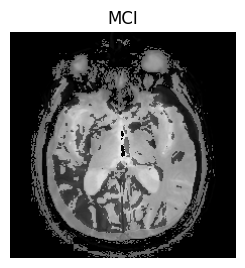

In [ ]:
img, label = next(iter(train_loader))
print(img.shape)
print(label.shape)
show(img, label, denormalize=False)

Definition of CNN Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding="same")
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(16, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv5 = nn.Conv2d(64, 256, kernel_size=3)
        self.batch_norm = nn.BatchNorm2d(256, affine=False)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(160000,128)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = self.batch_norm(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 128, kernel_size=5)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=5)
        self.conv5 = nn.Conv2d(128, 512, kernel_size=5)
        self.batch_norm = nn.BatchNorm2d(512, affine=False)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(270848, 128)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = self.batch_norm(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

class CombinedModel(nn.Module):
    def __init__(self):
        super(CombinedModel, self).__init__()
        self.cnn1 = CNN1()
        self.cnn2 = CNN2()
        self.fc_combined = nn.Linear(128 * 2, 5)

    def forward(self, x):
        x1 = self.cnn1(x)
        x2 = self.cnn2(x)
        x = torch.cat((x1, x2), dim=1)
        x = self.fc_combined(x)
        return x



Definition of EarlyStop class, which is used to prevent overfitting

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0.0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0
        self.best_model_state = None

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.best_model_state = model.state_dict()
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.best_model_state = model.state_dict()
            self.counter = 0

    def load_best_model(self, model):
        model.load_state_dict(self.best_model_state)

### Loading all dependencies

---



Loading all dependencies

In [ ]:
model = CombinedModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=5, delta=0.001)

Checking layers of our NN

In [ ]:
import torchsummary

torchsummary.summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 222, 222]             448
            Conv2d-2         [-1, 16, 222, 222]           2,320
         MaxPool2d-3         [-1, 16, 111, 111]               0
            Conv2d-4         [-1, 64, 109, 109]           9,280
            Conv2d-5         [-1, 64, 107, 107]          36,928
         MaxPool2d-6           [-1, 64, 53, 53]               0
            Conv2d-7          [-1, 256, 51, 51]         147,712
         MaxPool2d-8          [-1, 256, 25, 25]               0
       BatchNorm2d-9          [-1, 256, 25, 25]               0
          Dropout-10          [-1, 256, 25, 25]               0
           Linear-11                  [-1, 128]      20,480,128
             CNN1-12                  [-1, 128]               0
           Conv2d-13         [-1, 32, 220, 220]           2,432
           Conv2d-14         [-1, 32, 2

## Model testing

---



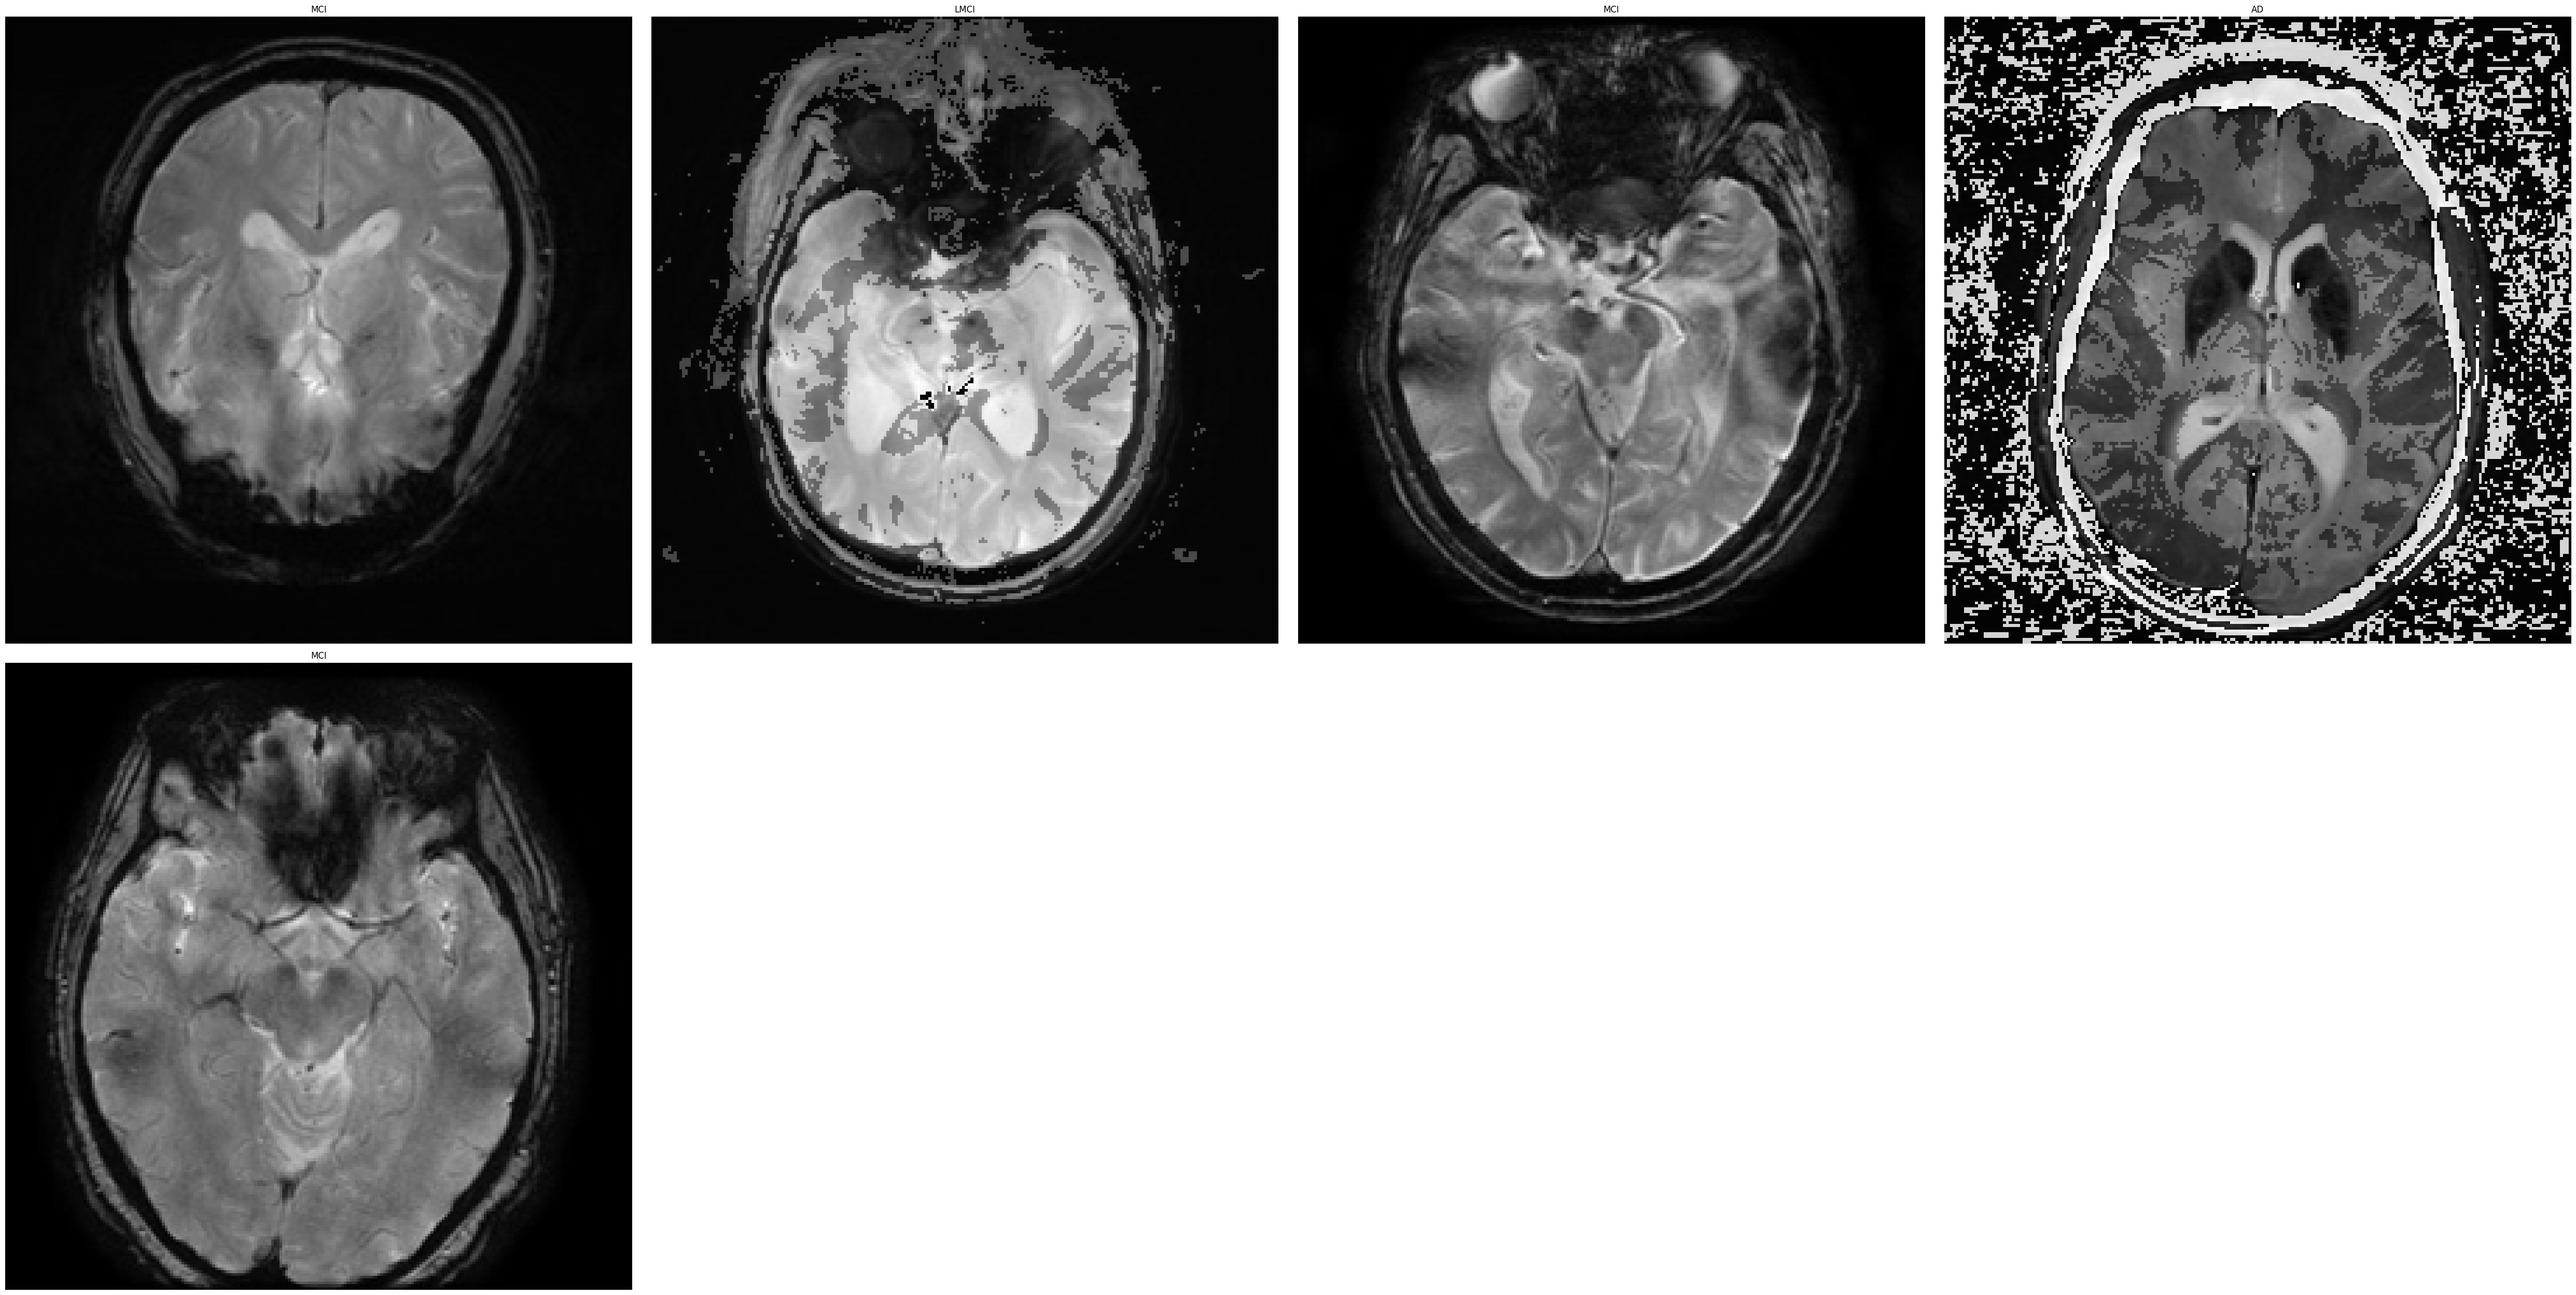

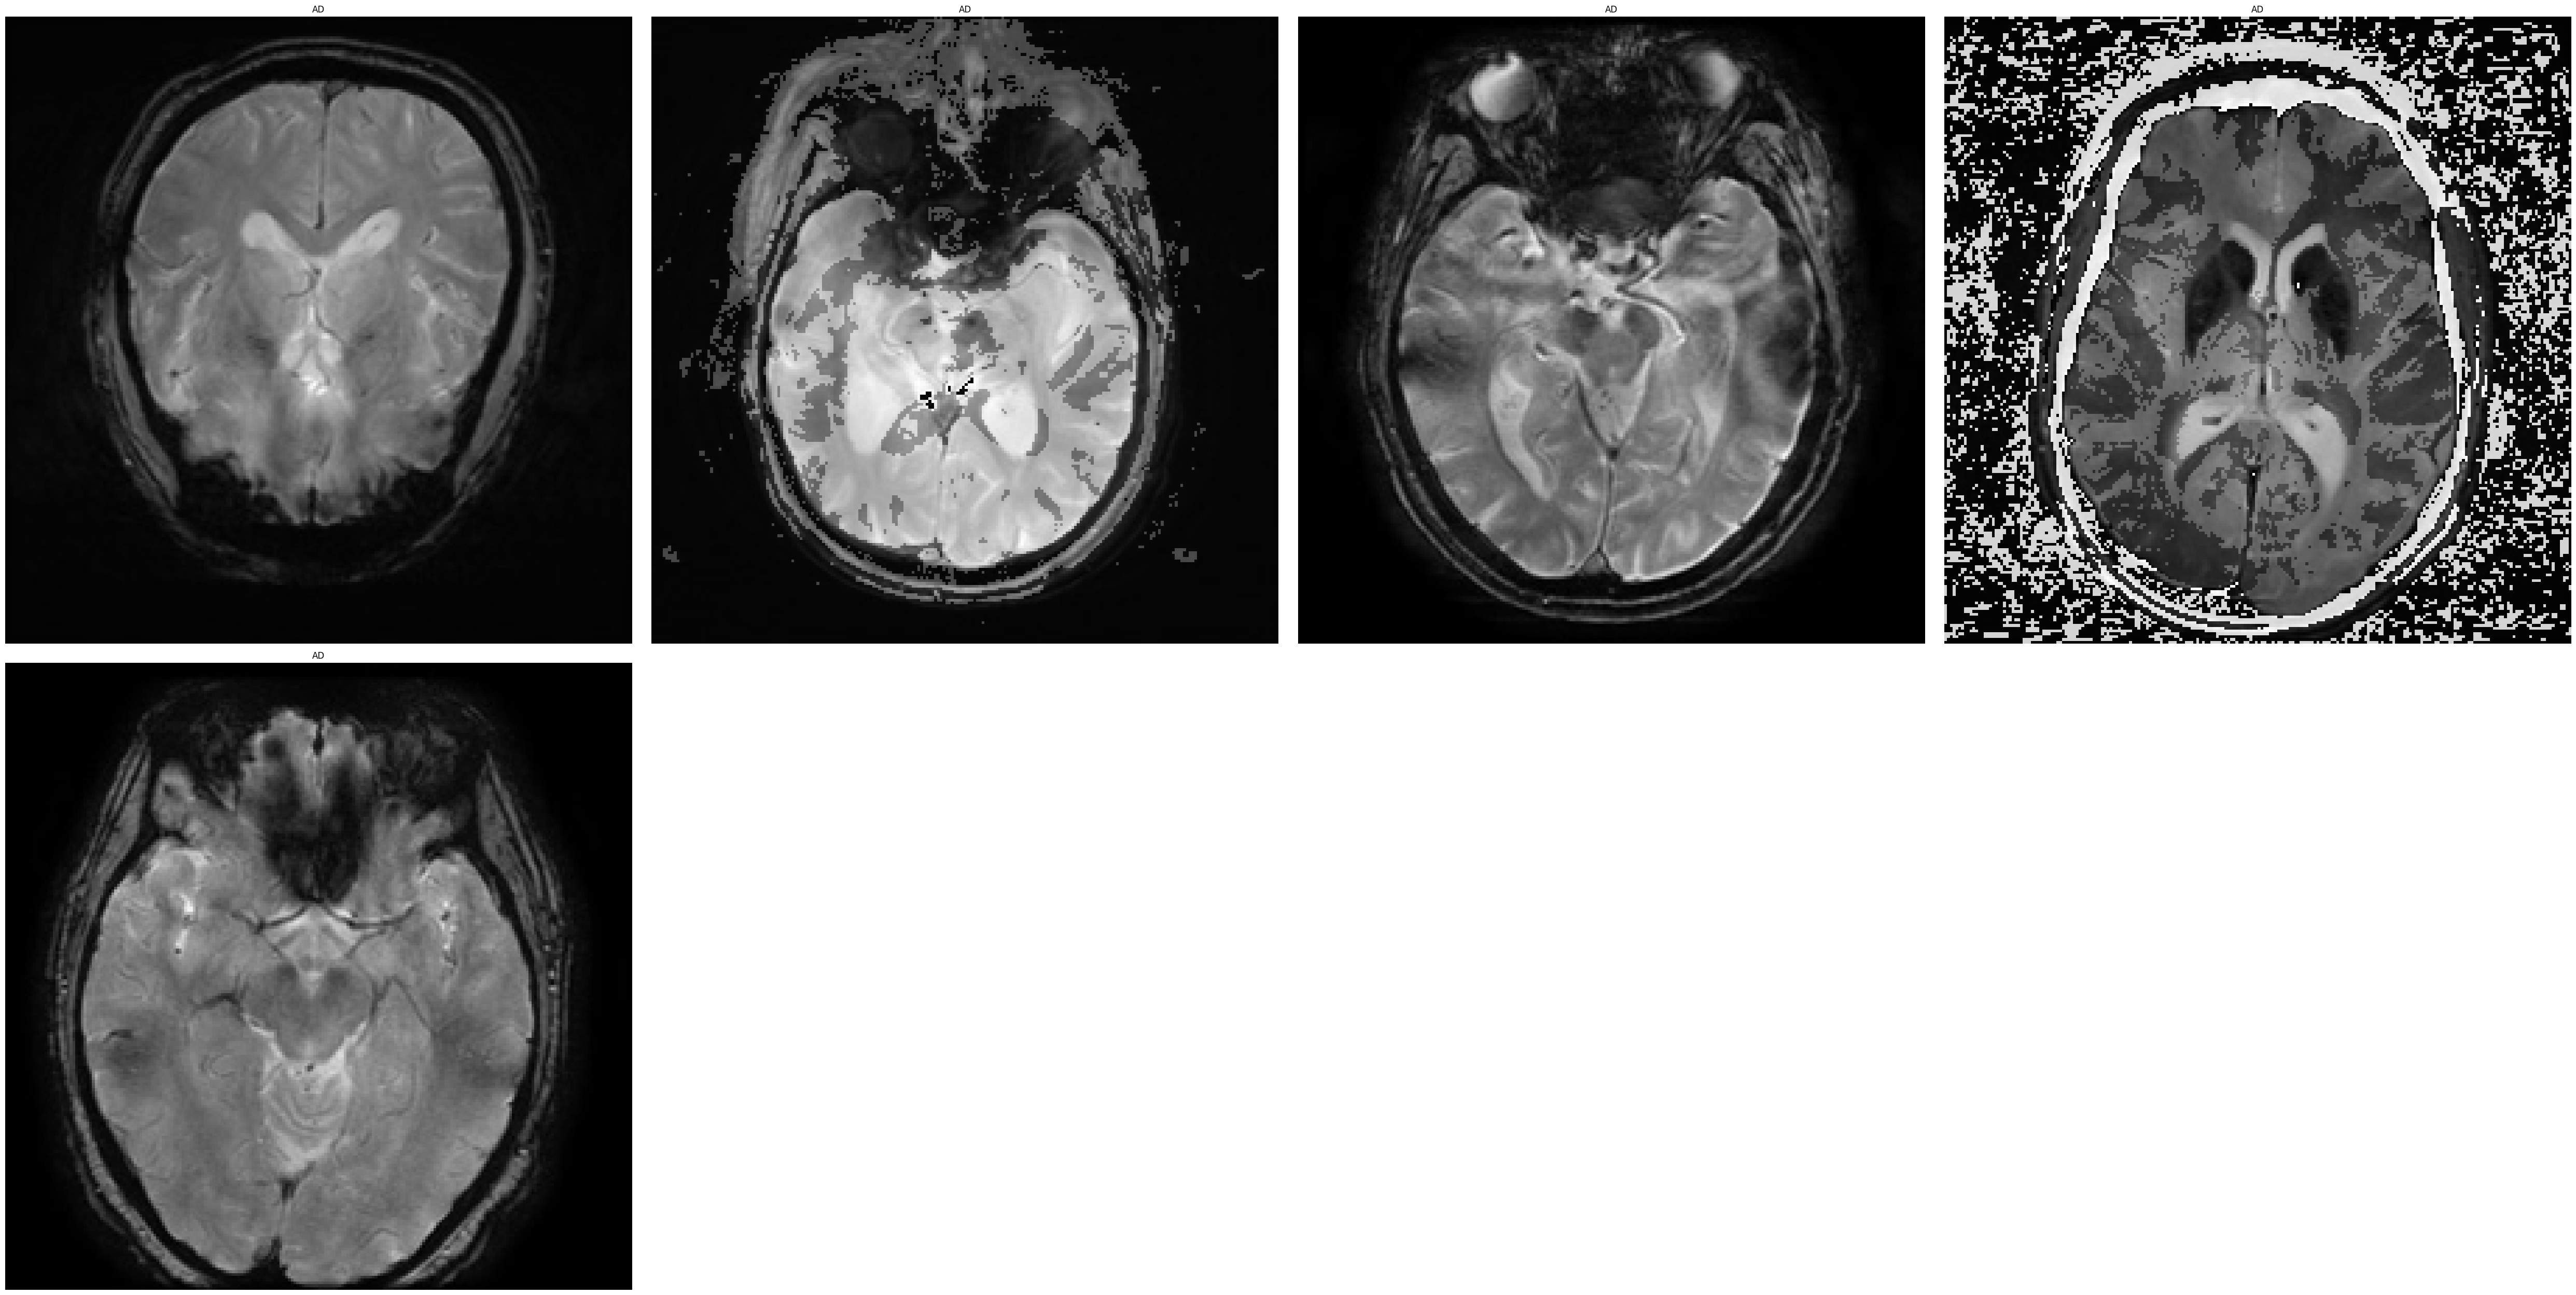

In [ ]:
x, y = next(iter(train_loader))
show(x, y)

_, y_res = torch.max(model(x), 1)
show(x, y_res)

## Learning rate finder


In [ ]:
def lr_finder(model, train_loader, criterion, optimizer, start_lr=1e-7, end_lr=1e-1, num_iters=100):
    model.train()
    lrs = []
    losses = []

    # Exponential learning rate scaling
    lr_lambda = lambda x: start_lr * (end_lr / start_lr) ** (x / num_iters)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    best_loss = float('inf')
    for i, (inputs, targets) in enumerate(train_loader):
        if i >= num_iters:
            break


        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
        scheduler.step()

        # Track learning rates and losses
        lrs.append(scheduler.get_last_lr()[0])
        losses.append(loss.item())

        # Stop if loss diverges
        if loss.item() > best_loss * 4:
            break
        best_loss = min(best_loss, loss.item())

    # Plot LR vs. Loss
    # plt.figure(figsize=(8, 6))
    plt.plot(lrs, losses)
    plt.xscale("log")
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning Rate Finder")
    plt.show()

    return lrs, losses

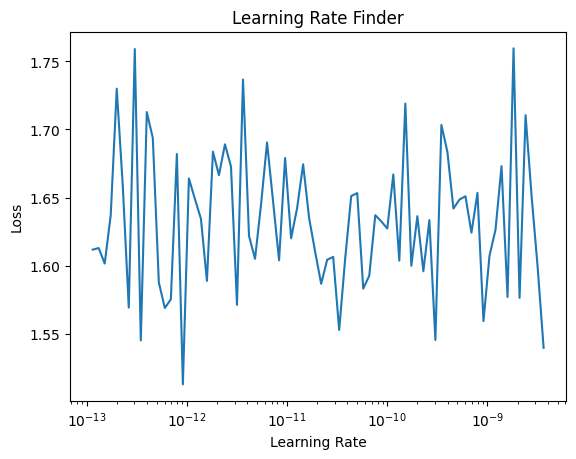

In [ ]:
lr, loss = lr_finder(model, train_loader, criterion, optimizer)

## Model Training

---



Trainig of CNN

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, LRScheduler
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.01)
def train(model, train_loader, validate_loader, criterion, optimizer, num_epochs=10):
    all_states = {}
    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0

        for images, labels  in train_loader:


            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
            running_loss += (loss.item() * batch_size)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, labels in validate_loader:
                output = model(images)

                loss = criterion(output, labels)
                val_loss += (loss.item() * batch_size)

        val_loss /= len(validate_loader.dataset)
        scheduler.step(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}")

        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    early_stopping.load_best_model(model)



In [ ]:
train(model=model, train_loader=train_loader, validate_loader=validate_loader, criterion=criterion, optimizer=optimizer, num_epochs=num_epochs)

Epoch 1/25, Loss: 1.6015, Val Loss: 1.4807
Epoch 2/25, Loss: 1.2663, Val Loss: 1.4059
Epoch 3/25, Loss: 1.0747, Val Loss: 1.3559
Epoch 4/25, Loss: 0.8856, Val Loss: 1.2529
Epoch 5/25, Loss: 0.7197, Val Loss: 1.3433
Epoch 6/25, Loss: 0.6157, Val Loss: 1.3231
Epoch 7/25, Loss: 0.4980, Val Loss: 1.2059
Epoch 8/25, Loss: 0.4039, Val Loss: 1.1575
Epoch 9/25, Loss: 0.3461, Val Loss: 1.4266
Epoch 10/25, Loss: 0.2727, Val Loss: 1.0453
Epoch 11/25, Loss: 0.2509, Val Loss: 1.1722
Epoch 12/25, Loss: 0.2025, Val Loss: 1.1014
Epoch 13/25, Loss: 0.1807, Val Loss: 1.1444
Epoch 14/25, Loss: 0.1315, Val Loss: 1.1073
Epoch 15/25, Loss: 0.1357, Val Loss: 1.1133
Early stopping


# Evaluation

---



## Evaluation function definition

In [ ]:
def eval_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for data, target in test_loader:
          outputs = model(data)
          _, predicted = torch.max(outputs.data, 1)
          total += target.size(0)
          correct += (predicted == target).sum().item()

  print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

In [ ]:
def eval_by_classes(model, test_loader):
  model.eval()
  accuracy_values = []
  classes = ("AD", "CN", "EMCI", "LMCI", "MCI")
  with torch.no_grad():
      n_correct = 0
      n_samples = 0
      n_class_correct = [0 for i in range(5)]
      n_class_samples = [0 for i in range(5)]
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          n_samples += labels.size(0)
          n_correct += (predicted == labels).sum().item()

          for i in range(labels.size(0) ):
              label = labels[i]
              pred = predicted[i]
              if (label == pred):
                  n_class_correct[label] += 1
              n_class_samples[label] += 1

      acc = 100.0 * n_correct / n_samples
      print(f'Accuracy of the network: {acc:.2f} %')

      for i in range(5):
          acc = 100.0 * n_class_correct[i] / n_class_samples[i]
          accuracy_values.append(acc)

  accuracy_categories = classes


  fig, ax = plt.subplots(figsize=(8, 5))
  ax.bar(accuracy_categories, accuracy_values, color='purple')
  ax.set_xlabel("Categories")
  ax.set_ylabel("Accuracy (%)")
  ax.set_title("Accuracy per Category")

  for i, v in enumerate(accuracy_values):
      ax.text(i, v + 1, f'{v:.2f}%', ha='center', color='black')

  plt.show()

In [ ]:
def y_real_pred(model, test_loader):
  model.eval()
  y_real = []
  y_pred = []
  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          y_real.append(labels.cpu().numpy())
          y_pred.append(predicted.cpu().numpy())
  return np.concatenate(y_real), np.concatenate(y_pred)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, multilabel_confusion_matrix, ConfusionMatrixDisplay,precision_recall_curve,PrecisionRecallDisplay, accuracy_score,balanced_accuracy_score, matthews_corrcoef
import seaborn as sns

lables = ['0', '1', '2', '3', '4']
categories = (get_labels(torch.tensor([0, 1, 2, 3, 4])))

def overall_metrics(y_real, y_pred):

  overall_metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy', "Balanced Acc", "MCE"]
  overall_values = []

  overall_values.append(precision_score(y_real, y_pred, average='macro',  zero_division=0))
  overall_values.append(recall_score(y_real, y_pred, average='macro',  zero_division=0))
  overall_values.append(f1_score(y_real, y_pred, average='macro',  zero_division=0))
  overall_values.append(accuracy_score(y_real, y_pred))
  overall_values.append(balanced_accuracy_score(y_real, y_pred))
  overall_values.append(matthews_corrcoef(y_real, y_pred))

  fig, ax = plt.subplots(figsize=(8, 5))
  ax.bar(overall_metrics, overall_values, color=['blue', 'green', 'red', 'purple'])
  ax.set_xlabel("Metrics")
  ax.set_ylabel("Score")
  ax.set_title("Overall Metrics")

  for i, v in enumerate(overall_values):
      ax.text(i, v + 0.02, f'{v:.4f}', ha='center', color='black')

  plt.show()


def metrics_by_category(y_real, y_pred):
  precision = precision_score(y_real, y_pred, average=None,  zero_division=0)
  recall = recall_score(y_real, y_pred, average=None,  zero_division=0)
  f1 = f1_score(y_real, y_pred, average=None,  zero_division=0)


  x = np.arange(len(lables))
  width = 0.25

  fig, ax = plt.subplots(figsize=(8, 5))
  ax.bar(x - width, precision, width, label='Precision', color='blue')
  ax.bar(x, recall, width, label='Recall', color='green')
  ax.bar(x + width, f1, width, label='F1-Score', color='red')

  ax.set_xlabel("Categories")
  ax.set_ylabel("Score")
  ax.set_title("Precision, Recall, and F1-Score per Category")
  ax.set_xticks(x)
  ax.set_xticklabels(categories)
  ax.legend()

  for i in range(len(categories)):
      ax.text(x[i] - width, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', color='blue')
      ax.text(x[i], recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', color='green')
      ax.text(x[i] + width, f1[i] + 0.02, f'{f1[i]:.2f}', ha='center', color='red')

  plt.show()


def confusion_matrix(y_real, y_pred):
  mlcm = multilabel_confusion_matrix(y_real, y_pred,
                              labels=lables)

  fig, axes = plt.subplots(1, 5, figsize=(15, 3))
  for i, (category, cm) in enumerate(zip(categories, mlcm)):
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
      axes[i].set_title(category)
      axes[i].set_xlabel("Predicted")
      axes[i].set_ylabel("Actual")

  plt.tight_layout()
  plt.show()

  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_real, y_pred, ax=ax)
  ax.xaxis.set_ticklabels(categories)
  ax.yaxis.set_ticklabels(categories)
  _ = ax.set_title(
      f"Confusion Matrix"
  )

In [ ]:
def dataset_distribution(data, title):
  labels = list(data.keys())
  sizes = list(data.values())

  plt.figure(figsize=(8, 8))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])

  plt.title(title)

  plt.show()

## Evaluation of model and datasets

---



### Datasets Evaluation

---



#### Dataset 1

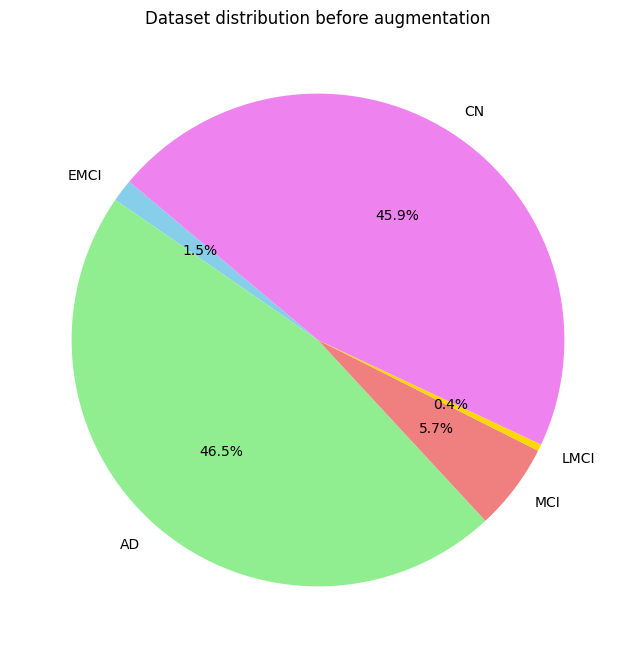

In [ ]:
dataset_distribution(data_before, "Dataset 1 distribution before augmentation")

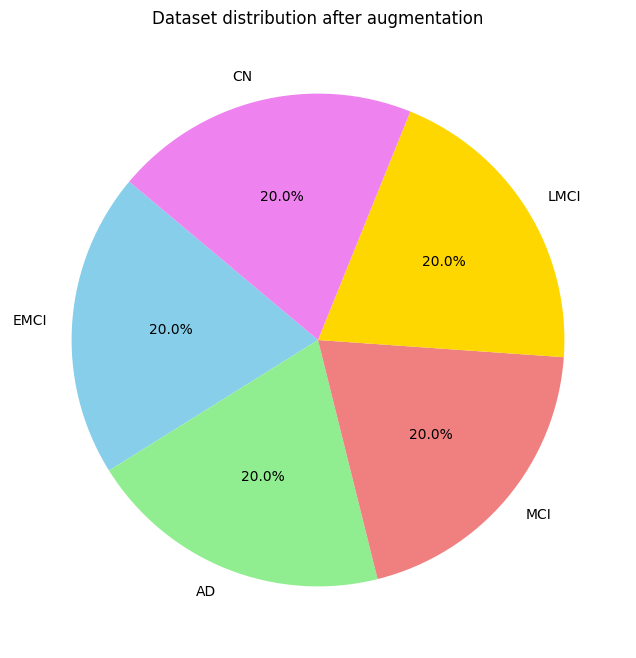

In [ ]:
dataset_distribution(data_after, "Dataset 1 distribution after augmentation")

#### Dataset 2

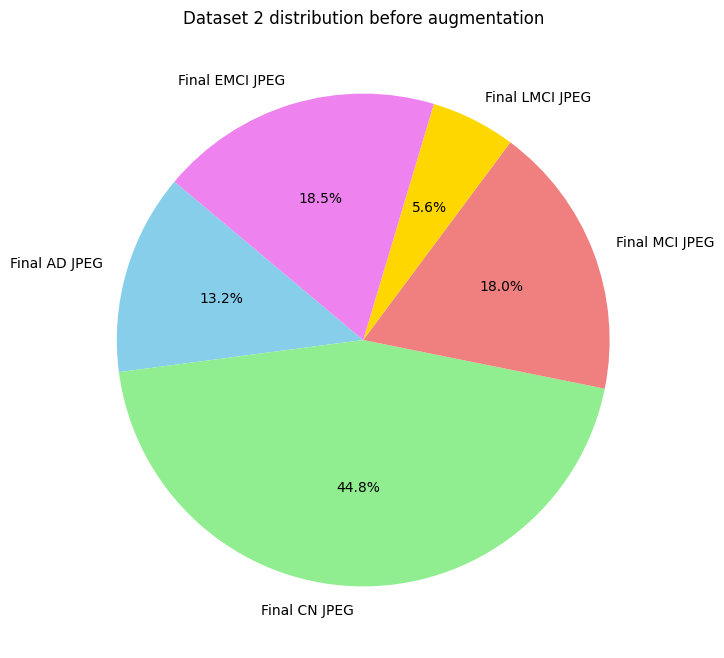

In [ ]:
dataset_distribution(data_before_2, "Dataset 2 distribution before augmentation")

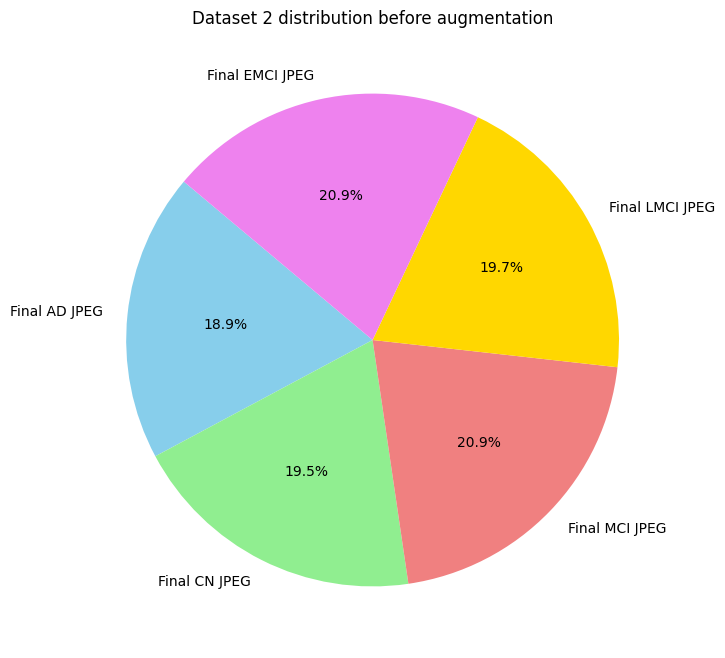

In [ ]:
dataset_distribution(data_after_2, "Dataset 2 distribution before augmentation")

### Model Evaluation

---



#### Evaluation on dataset 1

---



In [ ]:
eval_model(model, test_loader)

Accuracy of the model on the test images: 83.66%


Accuracy of the network: 83.66 %


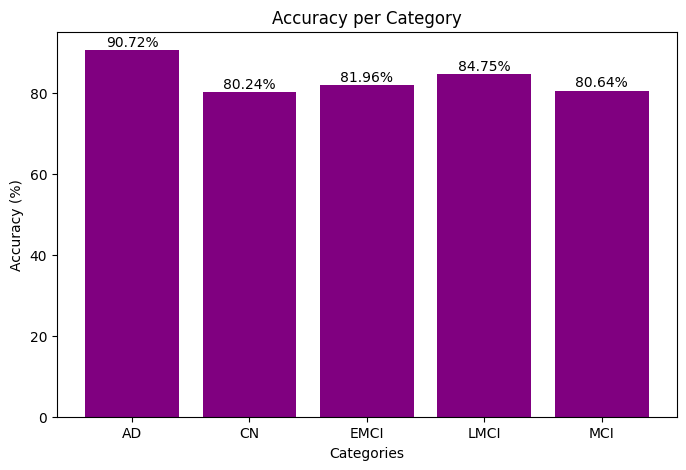

In [ ]:
eval_by_classes(model, test_loader)

In [ ]:
y_real, y_pred = y_real_pred(model, test_loader)

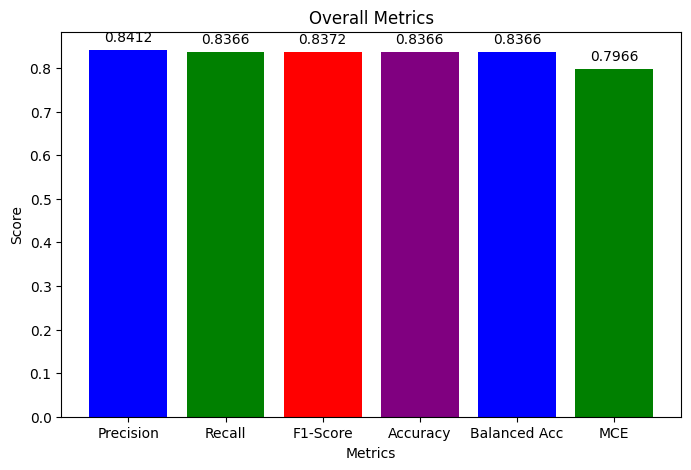

In [ ]:
overall_metrics(y_real, y_pred)

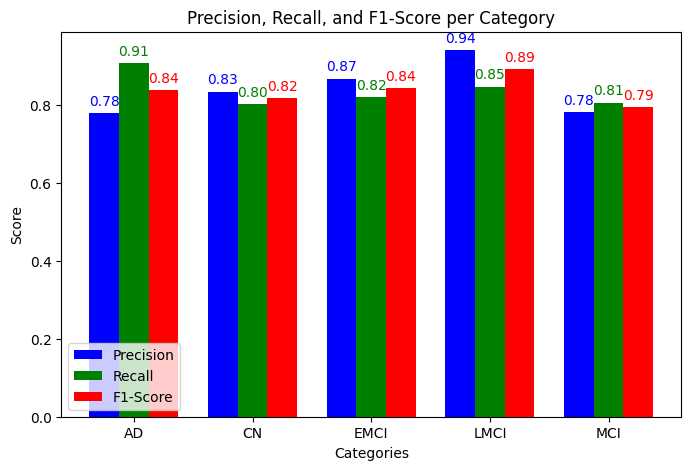

In [ ]:
metrics_by_category(y_real, y_pred)

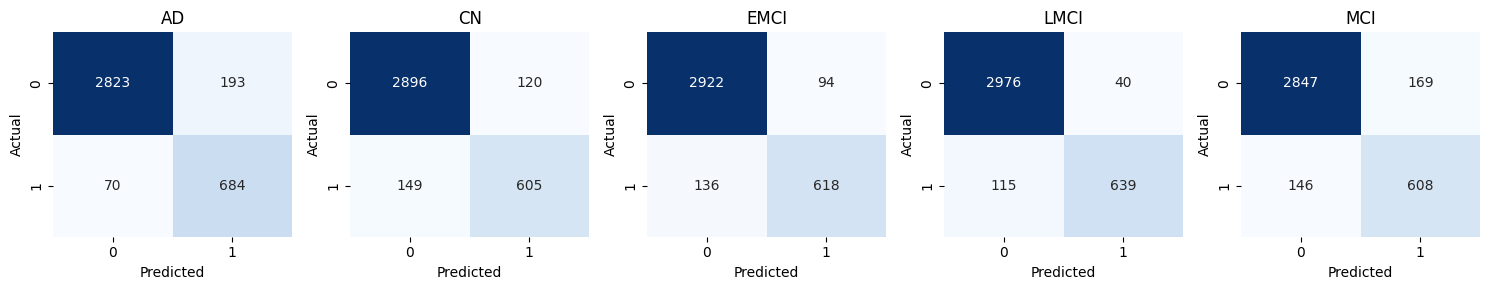

In [ ]:
confusion_matrix(y_real, y_pred)

#### Evaluation on dataset 2

---



##### SMOTA

Accuracy of the network: 67.93 %


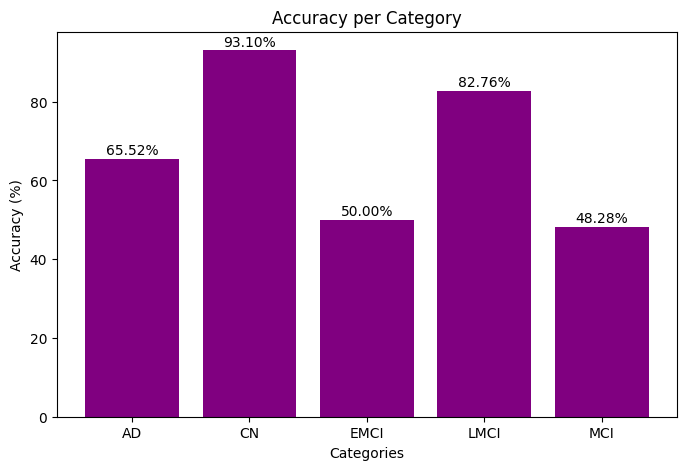

In [ ]:
eval_by_classes(model, test_loader)

In [ ]:
y_real, y_pred = y_real_pred(model, test_loader)

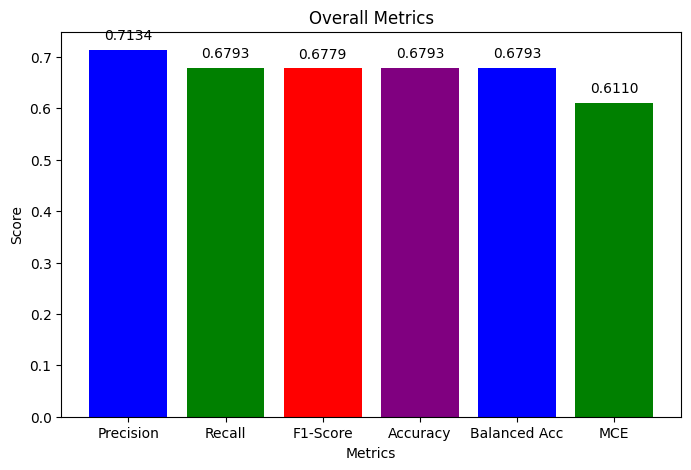

In [ ]:
overall_metrics(y_real, y_pred)

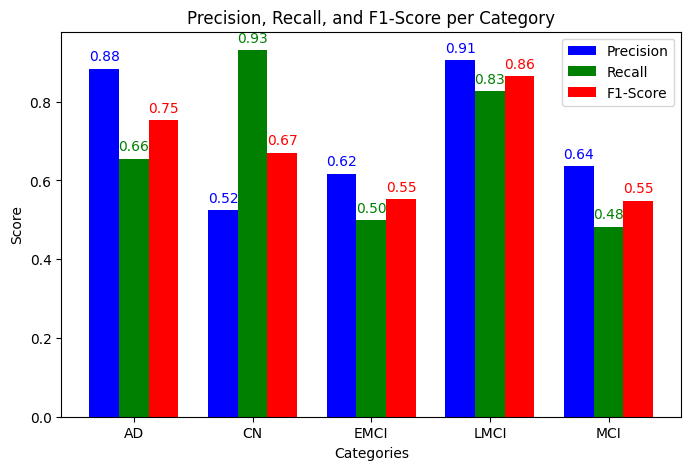

In [ ]:
metrics_by_category(y_real, y_pred)

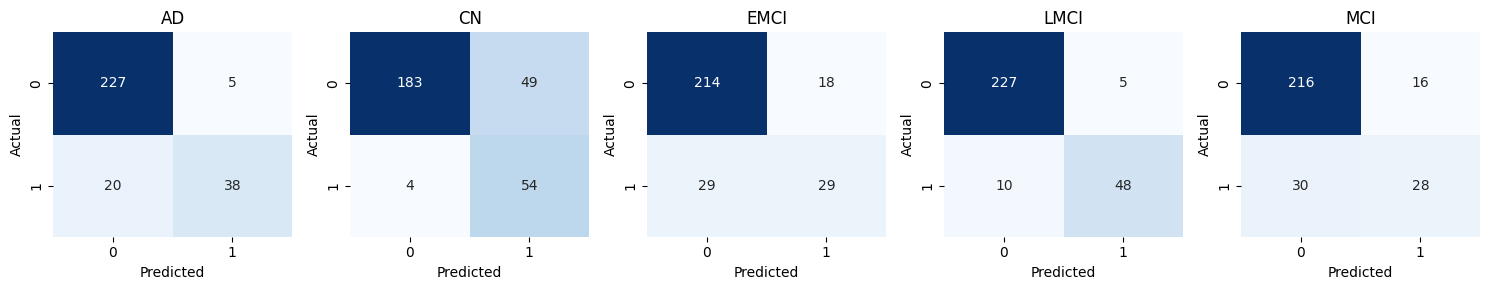

In [ ]:
confusion_matrix(y_real, y_pred)

##### ADASYN

Accuracy of the network: 68.01 %


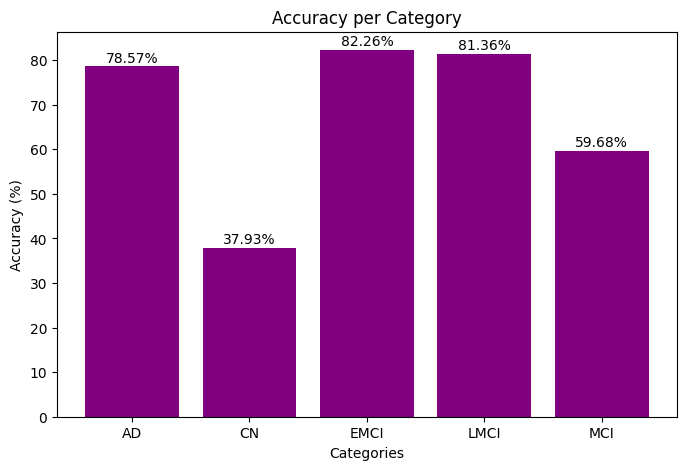

In [ ]:
eval_by_classes(model, test_loader)

In [ ]:
y_real, y_pred = y_real_pred(model, test_loader)

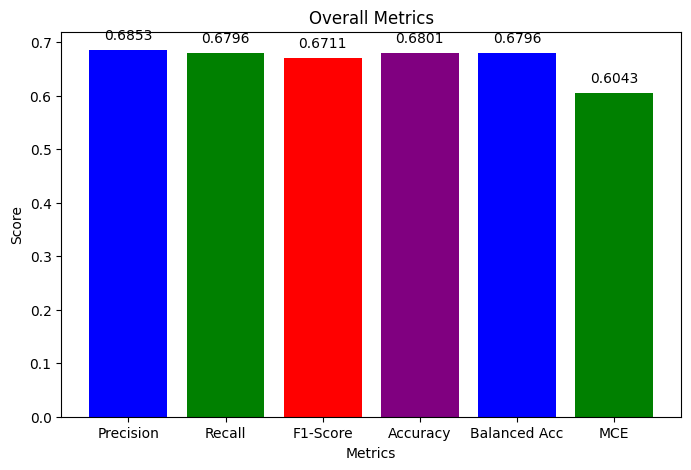

In [ ]:
overall_metrics(y_real, y_pred)

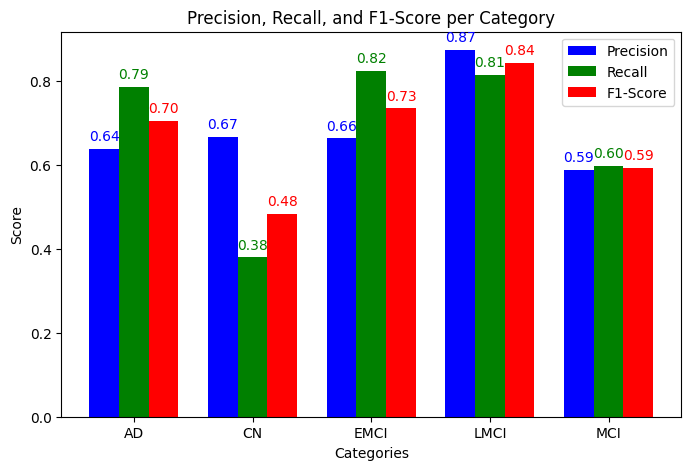

In [ ]:
metrics_by_category(y_real, y_pred)

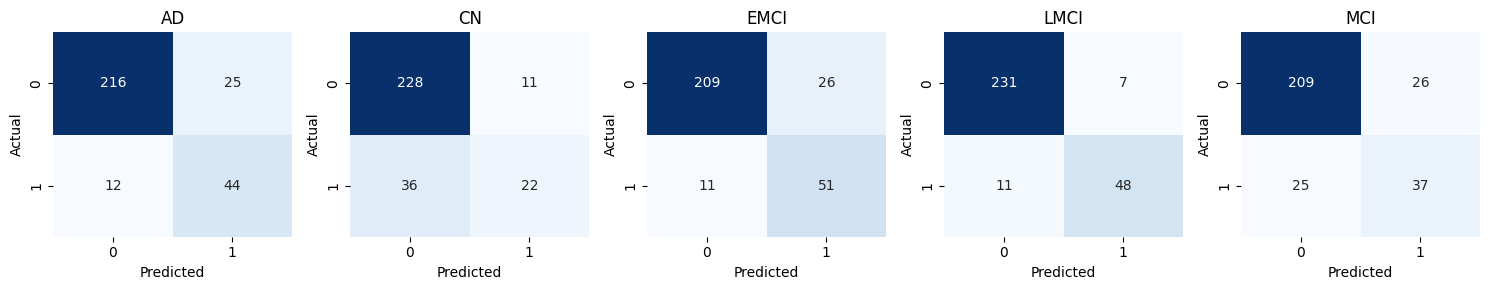

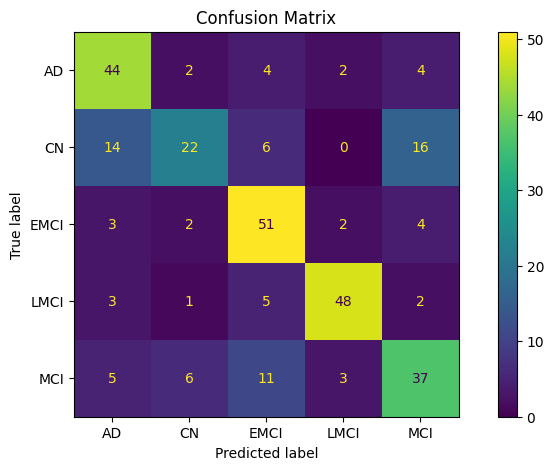

In [ ]:
confusion_matrix(y_real, y_pred)

##### Cut of data + ADASYN for training dataset only

Accuracy of the network: 28.57 %


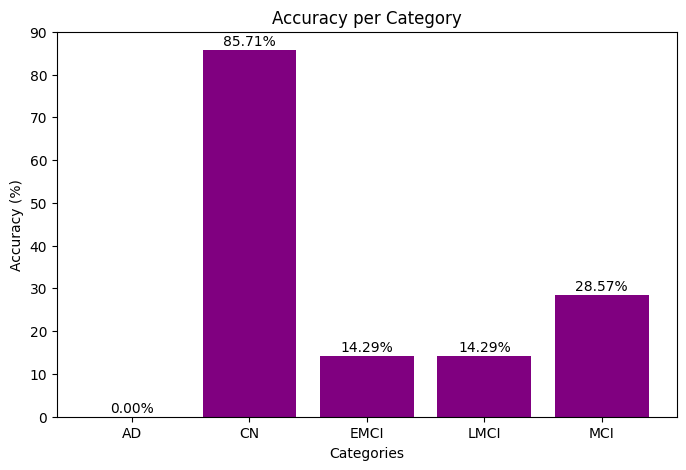

In [ ]:
eval_by_classes(model, test_loader)

In [ ]:
y_real, y_pred = y_real_pred(model, test_loader)

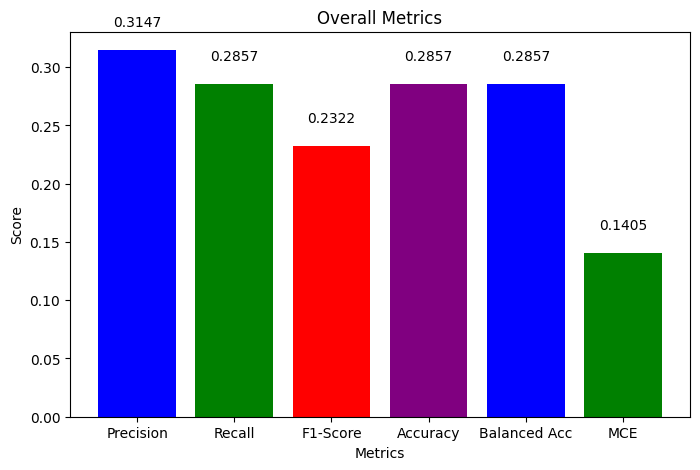

In [ ]:
overall_metrics(y_real, y_pred)

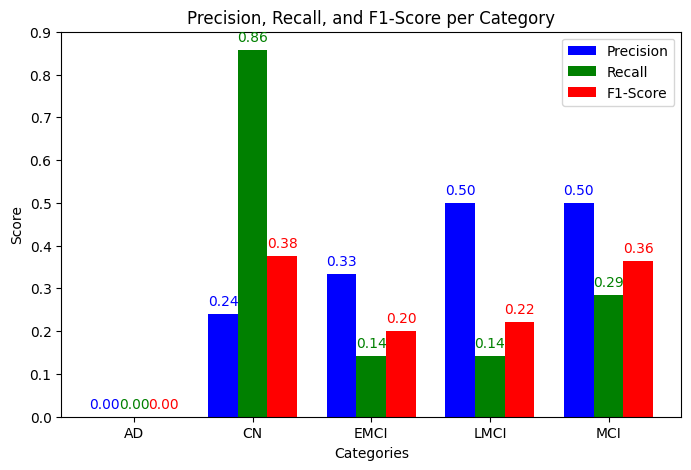

In [ ]:
metrics_by_category(y_real, y_pred)

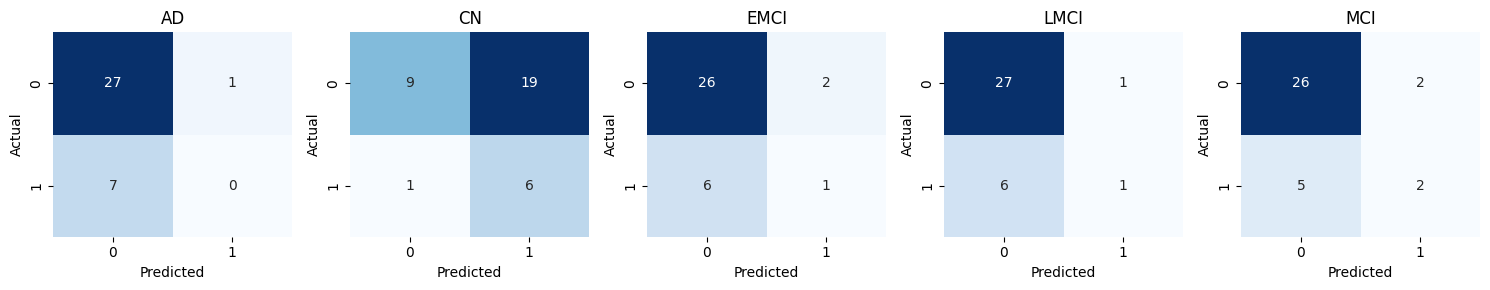

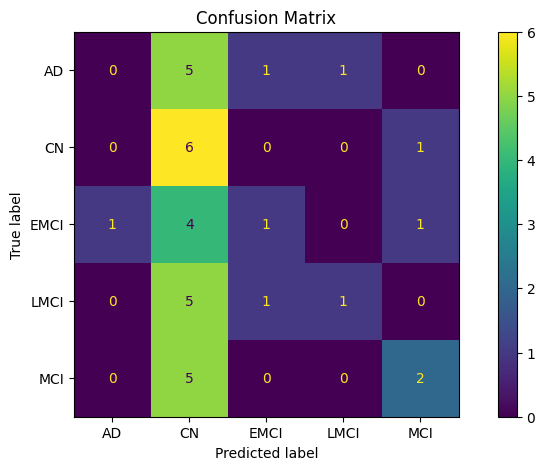

In [ ]:
confusion_matrix(y_real, y_pred)